<a href="https://colab.research.google.com/github/farisahmed123/Student-Data-Base-Program/blob/main/notebook8283571ddf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# IMPORTANT: RUN THIS CELL IN ORDER TO IMPORT YOUR KAGGLE DATA SOURCES,
# THEN FEEL FREE TO DELETE THIS CELL.
# NOTE: THIS NOTEBOOK ENVIRONMENT DIFFERS FROM KAGGLE'S PYTHON
# ENVIRONMENT SO THERE MAY BE MISSING LIBRARIES USED BY YOUR
# NOTEBOOK.
import kagglehub
anthonytherrien_dog_vs_cat_path = kagglehub.dataset_download('anthonytherrien/dog-vs-cat')

print('Data source import complete.')


Data source import complete.


In [6]:
for dirname, _, filenames in os.walk('/kaggle/input/dog-vs-cat'):
    for filename in filenames:
        print(os.path.join(dirname, filename))


/kaggle/input/dog-vs-cat/animals/dog/00985-127787239.png
/kaggle/input/dog-vs-cat/animals/dog/00667-3846168829.png
/kaggle/input/dog-vs-cat/animals/dog/00891-3846169053.png
/kaggle/input/dog-vs-cat/animals/dog/00528-3846168690.png
/kaggle/input/dog-vs-cat/animals/dog/00689-3846168851.png
/kaggle/input/dog-vs-cat/animals/dog/00593-3846168755.png
/kaggle/input/dog-vs-cat/animals/dog/00894-3846169056.png
/kaggle/input/dog-vs-cat/animals/dog/00622-3846168784.png
/kaggle/input/dog-vs-cat/animals/dog/00907-3846169069.png
/kaggle/input/dog-vs-cat/animals/dog/00983-127787237.png
/kaggle/input/dog-vs-cat/animals/dog/00817-3846168979.png
/kaggle/input/dog-vs-cat/animals/dog/00576-3846168738.png
/kaggle/input/dog-vs-cat/animals/dog/00620-3846168782.png
/kaggle/input/dog-vs-cat/animals/dog/00940-3846169102.png
/kaggle/input/dog-vs-cat/animals/dog/00931-3846169093.png
/kaggle/input/dog-vs-cat/animals/dog/00904-3846169066.png
/kaggle/input/dog-vs-cat/animals/dog/00996-127787250.png
/kaggle/input/dog

In [4]:
import glob

# All image file paths
image_paths = glob.glob('/kaggle/input/dog-vs-cat/train/*.jpg')

# Labels based on filenames
labels = ['dog' if 'dog' in path else 'cat' for path in image_paths]


In [5]:
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    print(dirname)


/kaggle/input
/kaggle/input/dog-vs-cat
/kaggle/input/dog-vs-cat/animals
/kaggle/input/dog-vs-cat/animals/dog
/kaggle/input/dog-vs-cat/animals/cat


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten,Conv2D,MaxPooling2D

In [8]:
from tensorflow.keras.utils import image_dataset_from_directory

dataset = image_dataset_from_directory(
    directory='/kaggle/input/dog-vs-cat/animals',
    labels='inferred',
    label_mode='binary',  # 'int' also works
    image_size=(256, 256),  # Resize all images to a consistent size
    batch_size=32
)


Found 1000 files belonging to 2 classes.


In [9]:
# from tensorflow.keras.utils import image_dataset_from_directory

# Load the dataset from the directory
train_ds = image_dataset_from_directory(
    directory='/kaggle/input/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)
val_ds = image_dataset_from_directory(
    directory='/kaggle/input/dog-vs-cat/animals',  # Path to dataset
    labels='inferred',  # Automatically infer labels (dog and cat)
    label_mode='binary',  # Binary classification (dog vs cat)
    image_size=(256, 256),  # Resize images to 180x180
    batch_size=32  # Number of images per batch
)




Found 1000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [10]:
def process(image,label):
    image = tf.cast(image/255.,tf.float32)
    return image,label
train_ds = train_ds.map(process)
val_ds = val_ds.map(process)

In [11]:
from tensorflow.keras import layers, models

# Build the CNN model
model = models.Sequential([
    # layers.InputLayer(input_shape=(256, 256, 3)),  # Input layer with image size
    layers.Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape = (256,256,3)),  # Convolution layer
    layers.MaxPooling2D(pool_size = (2,2),strides = 2,padding = 'valid'),  # MaxPooling layer

    layers.Conv2D(64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid'),

    layers.Conv2D(128, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D(pool_size = (2,2),strides=2,padding = 'valid'),

    layers.Flatten(),  # Flatten the output
    layers.Dense(128, activation='relu'),  # Fully connected layer
    layers.Dense(64, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(optimizer='adam',
              loss='binary_crossentropy',  # Binary classification loss
              metrics=['accuracy'])

# Model summary to check the structure
model.summary()

print("ACcuracy Scors : "accuracy_score())

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10, # Number of training epochs
)


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 30s 671ms/step - accuracy: 0.5180 - loss: 1.2097 - val_accuracy: 0.6500 - val_loss: 0.6337
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 26s 420ms/step - accuracy: 0.7531 - loss: 0.4825 - val_accuracy: 0.9030 - val_loss: 0.2237
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 417ms/step - accuracy: 0.8874 - loss: 0.2667 - val_accuracy: 0.9380 - val_loss: 0.1664
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 548ms/step - accuracy: 0.9435 - loss: 0.1452 - val_accuracy: 0.9840 - val_loss: 0.0601
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 17s 422ms/step - accuracy: 0.9858 - loss: 0.0711 - val_accuracy: 0.9990 - val_loss: 0.0082
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 25s 551ms/step - accuracy: 0.9927 - loss: 0.0188 - val_accuracy: 0.9950 - val_loss: 0.0163
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 16s 419ms/step - accuracy: 0.9948 - loss: 0.0181 - val_accuracy: 0.9940 - val_loss: 0.0206
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 13s 422ms/step - accuracy: 0.9881 - loss: 0.0303 - val_accu

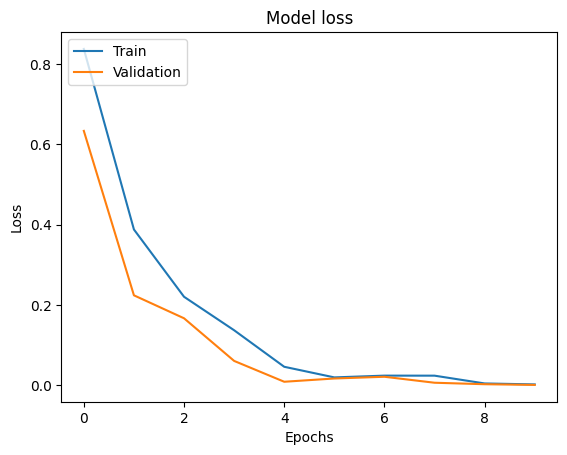

In [15]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()


In [48]:
import cv2
import os

path = r'C:\Users\FarisAhmed\Downloads\ss5.PNG'
print("Exists?", os.path.exists(path))  # Check if file exists

test_img = cv2.imread(path)

if test_img is None:
    print("Failed to load image. Try checking the file type or renaming.")
else:
    print("Loaded image shape:", test_img.shape)


Exists? False
Failed to load image. Try checking the file type or renaming.
